In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline
import re
import datetime

In [2]:
covid_violations = pd.read_csv('../data/covid_violations.csv')
covid_violations.head()

,Unnamed: 0,request_no,datetime_opened,contact_type,language,address,city,zip,lat,long,coord
0,0,346122,04/15/2020 11:33:26 AM,NaN,NaN,928 6th Ave S,NASHVILLE,37203.0,36.149040,-86.772273,"(36.1490396, -86.77227289999999)"
1,1,339374,04/04/2020 06:13:59 PM,NaN,NaN,500 Gallatin Ave,NASHVILLE,37206.0,36.181548,-86.749695,"(36.181548, -86.749695)"
2,2,343513,04/10/2020 10:40:08 AM,NaN,NaN,5720 Crossings Blvd,NaN,NaN,36.039608,-86.646541,"(36.039608, -86.646541)"
3,3,442996,08/12/2020 02:05:29 AM,NaN,NaN,7689 Hwy 70 S,NASHVILLE,37221.0,36.078933,-86.953400,"(36.07893290000001, -86.9533998)"
4,4,339423,04/04/2020 08:12:27 PM,NaN,NaN,5310 Mt View Rd,ANTIOCH,37013.0,36.048182,-86.648447,"(36.0481819, -86.6484474)"


In [3]:
davidson = pd.read_csv('../data/davidson_cases.csv')
davidson.head()

,date,county,state,fips,cases,deaths
0,2020-03-08,Davidson,Tennessee,47037,1,0
1,2020-03-09,Davidson,Tennessee,47037,1,0
2,2020-03-10,Davidson,Tennessee,47037,1,0
3,2020-03-11,Davidson,Tennessee,47037,2,0
4,2020-03-12,Davidson,Tennessee,47037,6,0


In [4]:
covid_violations['datetime_opened'] = [re.sub(r'\s.*', '', i) for i in covid_violations['datetime_opened']]

In [5]:
covid_violations.head()

,Unnamed: 0,request_no,datetime_opened,contact_type,language,address,city,zip,lat,long,coord
0,0,346122,04/15/2020,NaN,NaN,928 6th Ave S,NASHVILLE,37203.0,36.149040,-86.772273,"(36.1490396, -86.77227289999999)"
1,1,339374,04/04/2020,NaN,NaN,500 Gallatin Ave,NASHVILLE,37206.0,36.181548,-86.749695,"(36.181548, -86.749695)"
2,2,343513,04/10/2020,NaN,NaN,5720 Crossings Blvd,NaN,NaN,36.039608,-86.646541,"(36.039608, -86.646541)"
3,3,442996,08/12/2020,NaN,NaN,7689 Hwy 70 S,NASHVILLE,37221.0,36.078933,-86.953400,"(36.07893290000001, -86.9533998)"
4,4,339423,04/04/2020,NaN,NaN,5310 Mt View Rd,ANTIOCH,37013.0,36.048182,-86.648447,"(36.0481819, -86.6484474)"


In [6]:
davidson['date'] = [datetime.datetime.strptime(i, '%Y-%m-%d').strftime('%m/%d/%Y') for i in davidson['date']]

In [7]:
davidson.head()

,date,county,state,fips,cases,deaths
0,03/08/2020,Davidson,Tennessee,47037,1,0
1,03/09/2020,Davidson,Tennessee,47037,1,0
2,03/10/2020,Davidson,Tennessee,47037,1,0
3,03/11/2020,Davidson,Tennessee,47037,2,0
4,03/12/2020,Davidson,Tennessee,47037,6,0


In [8]:
davidson = davidson.drop(columns=['county','state','fips'])
davidson.head()

,date,cases,deaths
0,03/08/2020,1,0
1,03/09/2020,1,0
2,03/10/2020,1,0
3,03/11/2020,2,0
4,03/12/2020,6,0


In [9]:
davidson_covid_violations = covid_violations.merge(davidson, how='left', left_on='datetime_opened', right_on='date')

In [10]:
davidson_covid_violations.head()

,Unnamed: 0,request_no,datetime_opened,contact_type,language,address,city,zip,lat,long,coord,date,cases,deaths
0,0,346122,04/15/2020,NaN,NaN,928 6th Ave S,NASHVILLE,37203.0,36.149040,-86.772273,"(36.1490396, -86.77227289999999)",04/15/2020,1492.0,18.0
1,1,339374,04/04/2020,NaN,NaN,500 Gallatin Ave,NASHVILLE,37206.0,36.181548,-86.749695,"(36.181548, -86.749695)",04/04/2020,856.0,6.0
2,2,343513,04/10/2020,NaN,NaN,5720 Crossings Blvd,NaN,NaN,36.039608,-86.646541,"(36.039608, -86.646541)",04/10/2020,1224.0,13.0
3,3,442996,08/12/2020,NaN,NaN,7689 Hwy 70 S,NASHVILLE,37221.0,36.078933,-86.953400,"(36.07893290000001, -86.9533998)",08/12/2020,23434.0,221.0
4,4,339423,04/04/2020,NaN,NaN,5310 Mt View Rd,ANTIOCH,37013.0,36.048182,-86.648447,"(36.0481819, -86.6484474)",04/04/2020,856.0,6.0


In [11]:
davidson_covid_violations = davidson_covid_violations.sort_values(by='date')

In [12]:
davidson_covid_violations  = davidson_covid_violations.reset_index(drop = True)

In [13]:
davidson_covid_violations = davidson_covid_violations.drop(columns=['Unnamed: 0','contact_type','language','date'])
davidson_covid_violations.head()

,request_no,datetime_opened,address,city,zip,lat,long,coord,cases,deaths
0,334955,03/29/2020,12 E Thompson Ln,NASHVILLE,37211.0,36.11591,-86.71984,"(36.11591, -86.71984)",394.0,2.0
1,335661,03/30/2020,700 12th Ave S,NASHVILLE,37203.0,36.15062,-86.78397,"(36.15062, -86.78397)",443.0,3.0
2,336223,03/31/2020,NaN,NaN,NaN,NaN,NaN,NaN,541.0,3.0
3,335975,03/31/2020,1813 8th Ave S,NASHVILLE,37203.0,36.13537,-86.77946,"(36.13537, -86.77946)",541.0,3.0
4,335969,03/31/2020,6410 Charlotte Pike,NASHVILLE,37209.0,36.14324,-86.87461,"(36.14324, -86.87461)",541.0,3.0


In [14]:
davidson_covid_violations['cumulative_violations'] = davidson_covid_violations.index + 1

In [15]:
davidson_covid_violations.head()

,request_no,datetime_opened,address,city,zip,lat,long,coord,cases,deaths,cumulative_violations
0,334955,03/29/2020,12 E Thompson Ln,NASHVILLE,37211.0,36.11591,-86.71984,"(36.11591, -86.71984)",394.0,2.0,1
1,335661,03/30/2020,700 12th Ave S,NASHVILLE,37203.0,36.15062,-86.78397,"(36.15062, -86.78397)",443.0,3.0,2
2,336223,03/31/2020,NaN,NaN,NaN,NaN,NaN,NaN,541.0,3.0,3
3,335975,03/31/2020,1813 8th Ave S,NASHVILLE,37203.0,36.13537,-86.77946,"(36.13537, -86.77946)",541.0,3.0,4
4,335969,03/31/2020,6410 Charlotte Pike,NASHVILLE,37209.0,36.14324,-86.87461,"(36.14324, -86.87461)",541.0,3.0,5


In [16]:
cases_deaths_time = davidson_covid_violations.drop(columns=['request_no','address','city','zip','lat','long','coord'])

In [17]:
cases_deaths_time.head()

,datetime_opened,cases,deaths,cumulative_violations
0,03/29/2020,394.0,2.0,1
1,03/30/2020,443.0,3.0,2
2,03/31/2020,541.0,3.0,3
3,03/31/2020,541.0,3.0,4
4,03/31/2020,541.0,3.0,5


In [18]:
cases_deaths_time['datetime_opened'] = cases_deaths_time['datetime_opened'].apply(pd.to_datetime)

In [19]:
cases_deaths_time = cases_deaths_time.set_index('datetime_opened')
cases_deaths_time.head()

,cases,deaths,cumulative_violations
datetime_opened,,,
2020-03-29,394.0,2.0,1
2020-03-30,443.0,3.0,2
2020-03-31,541.0,3.0,3
2020-03-31,541.0,3.0,4
2020-03-31,541.0,3.0,5


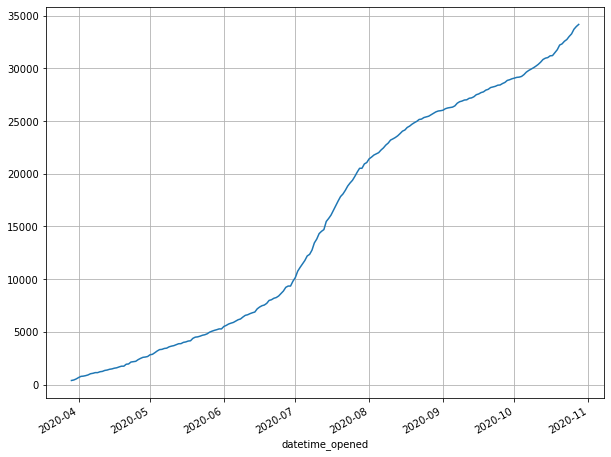

In [20]:
plt.rcParams['figure.figsize'] = (10, 8)   # Increases the Plot Size
cases_deaths_time['cases'].plot(grid = True)

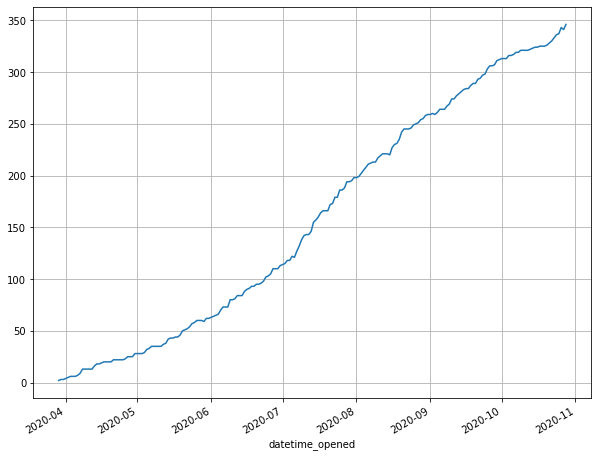

In [22]:
plt.rcParams['figure.figsize'] = (10, 8)   # Increases the Plot Size
cases_deaths_time['deaths'].plot(grid = True)

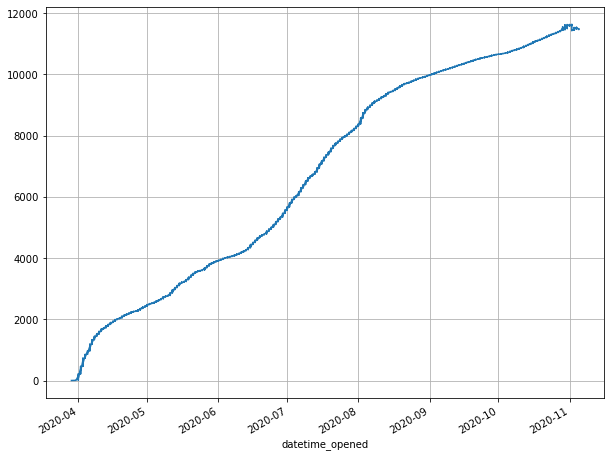

In [23]:
plt.rcParams['figure.figsize'] = (10, 8)   # Increases the Plot Size
cases_deaths_time['cumulative_violations'].plot(grid = True)

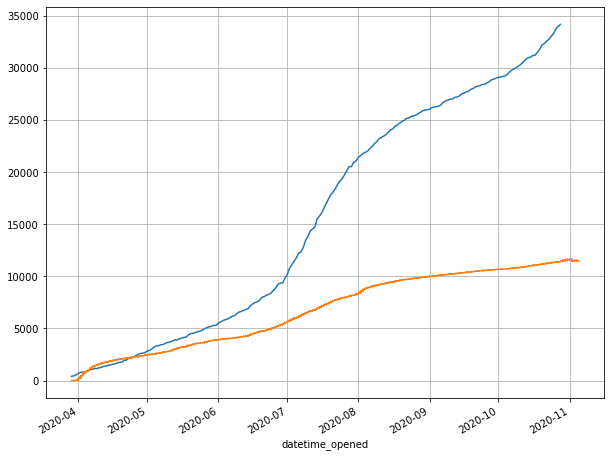

In [24]:
plt.rcParams['figure.figsize'] = (10, 8)   # Increases the Plot Size
cases_deaths_time['cases'].plot(grid = True)
cases_deaths_time['cumulative_violations'].plot(grid = True)